<a id="1.1"></a>
### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.layers import Dropout
import plotly.express as px
from chart_studio import plotly
import plotly.io as pio
import pickle
import plotly.graph_objects as go
from plotly.graph_objs import *
from tensorflow import keras
from keras.models import load_model
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import statsmodels.api as sm
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.stats import norm, lognorm, expon, gamma, beta, chi2
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, ttest_ind
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

 <a id="1.2"></a>
###  Load the dataset



In [2]:
# Load data
df = pd.read_csv('nifty.csv')



 <a id="1.3"></a>
###   Data Describtion 

In [3]:
df.describe().T

count         mean          std     min       25%      50%  \
Unnamed: 0  4999.0  2499.000000  1443.231328    0.00  1249.500  2499.00   
Price       4999.0  3306.953585  2319.250574  788.15  1129.935  2566.85   
Open        4999.0  3307.740212  2321.097771  786.37  1131.300  2558.50   
High        4999.0  3335.757526  2333.376552  805.82  1141.925  2585.60   
Low         4999.0  3277.187259  2304.771313  775.43  1120.650  2526.20   
Volume      4999.0   104.268726    78.143533    0.00    44.960    86.44   
%Chg        4999.0     0.053735     1.585128  -12.24    -0.750     0.08   

                 75%      max  
Unnamed: 0  3748.500  4998.00  
Price       5262.650  8996.25  
Open        5266.425  9109.15  
High        5302.700  9119.20  
Low         5225.625  8925.55  
Volume       146.980   686.89  
%Chg           0.880    17.74

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4999 non-null   int64  
 1   Date        4999 non-null   object 
 2   Price       4999 non-null   float64
 3   Open        4999 non-null   float64
 4   High        4999 non-null   float64
 5   Low         4999 non-null   float64
 6   Volume      4999 non-null   float64
 7   %Chg        4999 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 312.6+ KB


In [5]:
df.head()

Unnamed: 0         Date   Price    Open    High     Low  Volume  %Chg
0           0  11-Dec-1995  877.41  882.58  882.58  874.37     0.0 -1.09
1           1  18-Dec-1995  882.63  883.29  883.58  881.17     0.0 -0.09
2           2  14-Dec-1995  884.34  890.81  891.98  884.31     0.0 -0.55
3           3  29-Nov-1995  845.12  845.36  845.36  822.54     0.0  0.17
4           4  19-Dec-1995  883.72  882.35  884.19  879.54     0.0  0.12

In [6]:
## Statistical summary of the data
df.describe()

Unnamed: 0        Price         Open         High          Low  \
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.000000   
mean   2499.000000  3306.953585  3307.740212  3335.757526  3277.187259   
std    1443.231328  2319.250574  2321.097771  2333.376552  2304.771313   
min       0.000000   788.150000   786.370000   805.820000   775.430000   
25%    1249.500000  1129.935000  1131.300000  1141.925000  1120.650000   
50%    2499.000000  2566.850000  2558.500000  2585.600000  2526.200000   
75%    3748.500000  5262.650000  5266.425000  5302.700000  5225.625000   
max    4998.000000  8996.250000  9109.150000  9119.200000  8925.550000   

            Volume         %Chg  
count  4999.000000  4999.000000  
mean    104.268726     0.053735  
std      78.143533     1.585128  
min       0.000000   -12.240000  
25%      44.960000    -0.750000  
50%      86.440000     0.080000  
75%     146.980000     0.880000  
max     686.890000    17.740000

<Axes: >

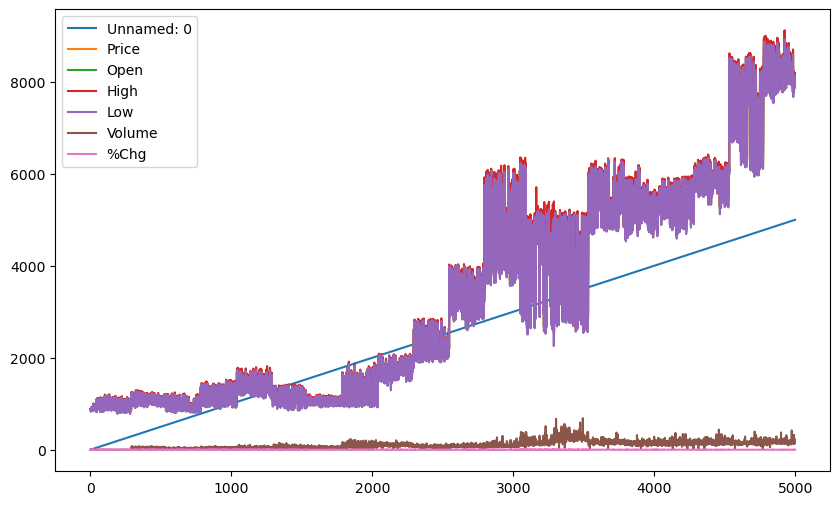

In [7]:
df.plot(figsize=(10,6))

# OBSERVATIONS

<a id='2'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> DATA PREPROCESSING </p>
    
Data preprocessing involves the systematic cleaning, transformation, and organization of raw data to enhance its quality and compatibility for analysis or modeling. This crucial step includes handling missing values, standardizing formats, scaling features, and addressing outliers, ensuring that the data is well-prepared for effective application in machine learning algorithms. 

In [8]:
df.isnull().sum()

Unnamed: 0    0
Date          0
Price         0
Open          0
High          0
Low           0
Volume        0
%Chg          0
dtype: int64

In [9]:

df.duplicated().sum()


df.drop_duplicates(inplace=True)

<a id="2.1"></a>
###  Data transformation 
    
We examined the data types of the columns, corrected the date type from "object" to "date," and designated the 'Date' column as the index.

In [10]:
# check the data types of the columns
df.dtypes

Unnamed: 0      int64
Date           object
Price         float64
Open          float64
High          float64
Low           float64
Volume        float64
%Chg          float64
dtype: object

In [11]:
# convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# set the 'Date' column as the index
#df.set_index('Date', inplace=True)

<a id='3'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> FEATURE EMGINEERING </p>
    
In this segment, I extracted pertinent information from the dataset and generated new features with the potential to enhance my models' performance. Through the transformation and amalgamation of existing features, my goal is to furnish the models with more meaningful and informative data to facilitate accurate predictions.



<a id="3.1"></a>
### Define a function to add new features to the data 
    

In [12]:
def add_features(data):
    # Add day of the week feature
    data['day_of_week'] = data['Date'].dt.dayofweek
    
    # Add month feature
    data['month'] = data['Date'].dt.month
    
    # Add quarter feature
    data['quarter'] = data['Date'].dt.quarter
    
    # Add year feature
    data['year'] = data['Date'].dt.year
    
    # Add week of the year feature
    data['week_of_year'] = data['Date'].dt.isocalendar().week
    
    # Add day of the year feature
    data['day_of_year'] = data['Date'].dt.dayofyear
    
    # Add lagged features
    data['lag_1'] = data['Price'].shift(1)
    data['lag_2'] = data['Price'].shift(2)
    data['lag_3'] = data['Price'].shift(3)
    data['lag_4'] = data['Price'].shift(4)
    data['lag_5'] = data['Price'].shift(5)
    
    return data

# Apply the function to the dataset
df = add_features(df)

# Display the modified DataFrame
print(df.head())


   Unnamed: 0       Date   Price    Open    High     Low  Volume  %Chg  \
0           0 1995-12-11  877.41  882.58  882.58  874.37     0.0 -1.09   
1           1 1995-12-18  882.63  883.29  883.58  881.17     0.0 -0.09   
2           2 1995-12-14  884.34  890.81  891.98  884.31     0.0 -0.55   
3           3 1995-11-29  845.12  845.36  845.36  822.54     0.0  0.17   
4           4 1995-12-19  883.72  882.35  884.19  879.54     0.0  0.12   

   day_of_week  month  quarter  year  week_of_year  day_of_year   lag_1  \
0            0     12        4  1995            50          345     NaN   
1            0     12        4  1995            51          352  877.41   
2            3     12        4  1995            50          348  882.63   
3            2     11        4  1995            48          333  884.34   
4            1     12        4  1995            51          353  845.12   

    lag_2   lag_3   lag_4  lag_5  
0     NaN     NaN     NaN    NaN  
1     NaN     NaN     NaN    NaN  

In [13]:
# Apply the function to the data
df = add_features(df)

# Drop rows with missing values
df.dropna(inplace=True)

df.head()

Unnamed: 0       Date   Price    Open    High     Low  Volume  %Chg  \
5           5 1995-11-17  898.86  898.72  900.41  885.31     0.0 -0.58   
6           6 1995-12-29  908.53  912.72  912.72  906.32     0.0 -0.66   
7           7 1995-11-23  849.50  856.20  856.20  842.33     0.0 -1.73   
8           8 1995-12-28  914.55  923.67  927.60  913.76     0.0 -0.86   
9           9 1995-12-07  898.62  881.97  901.25  881.97     0.0  2.24   

   day_of_week  month  quarter  year  week_of_year  day_of_year   lag_1  \
5            4     11        4  1995            46          321  883.72   
6            4     12        4  1995            52          363  898.86   
7            3     11        4  1995            47          327  908.53   
8            3     12        4  1995            52          362  849.50   
9            3     12        4  1995            49          341  914.55   

    lag_2   lag_3   lag_4   lag_5  
5  845.12  884.34  882.63  877.41  
6  883.72  845.12  884.34  882.63  
7  898.86  883.72  845.12  884.34  
8  908.53  898.86  883.72  845.12  
9  849.50  908.53  898.86  883.72

<a id='4'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> EXPLORATORY DATA ANALYSIS </p>
    


Exploratory Data Analysis (EDA) is a crucial phase in the data analysis process where statistical and visual methods are employed to understand the main characteristics of a dataset. 

Creating a list of the columns inside the dataframe so that we can can use it to make EDA 

In [14]:
feature_list = df.columns

In [15]:
feature_list

Index(['Unnamed: 0', 'Date', 'Price', 'Open', 'High', 'Low', 'Volume', '%Chg',
       'day_of_week', 'month', 'quarter', 'year', 'week_of_year',
       'day_of_year', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'],
      dtype='object')

<a id="4.1"></a>
### Create Box-Plots 

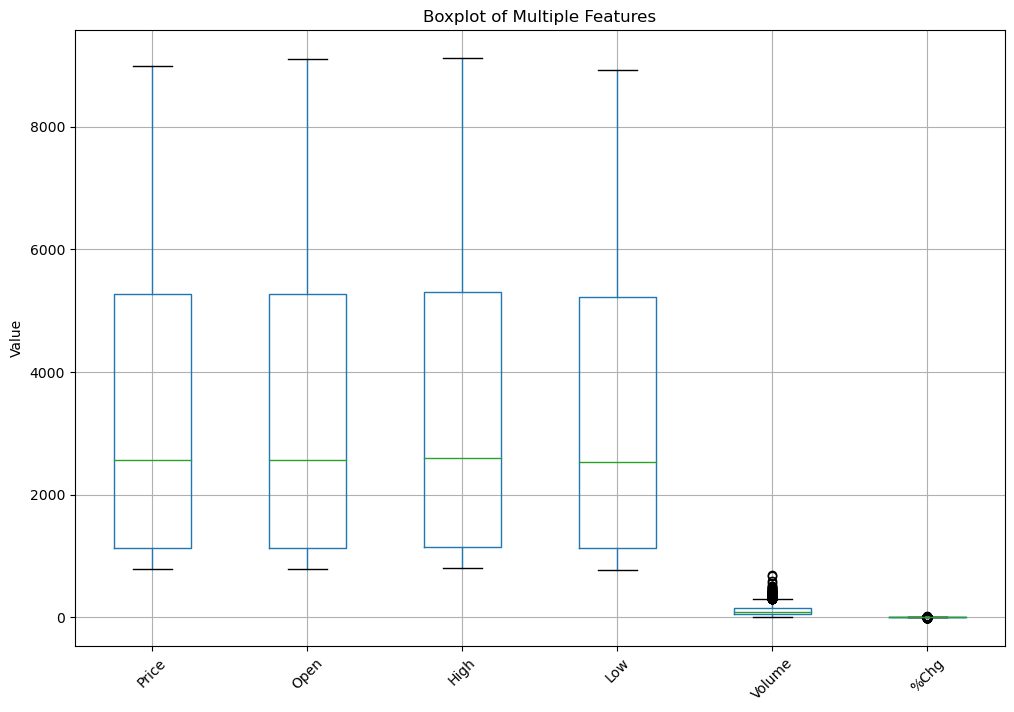

In [16]:
import matplotlib.pyplot as plt

# Selecting columns for boxplot
columns_of_interest = ['Price', 'Open', 'High', 'Low', 'Volume', '%Chg']

# Boxplot
plt.figure(figsize=(12, 8))
df[columns_of_interest].boxplot()
plt.title('Boxplot of Multiple Features')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<a id="4.2"></a>
### Create Line-Plots 

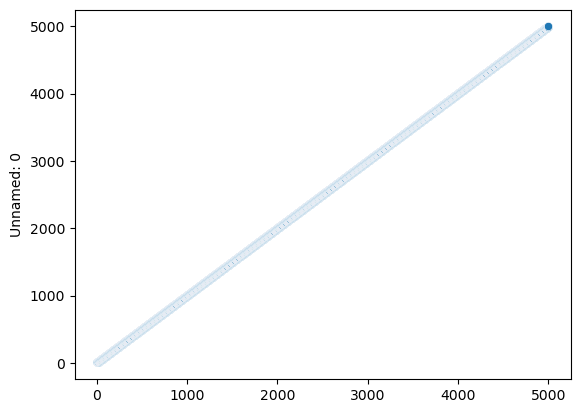

<Figure size 600x400 with 0 Axes>

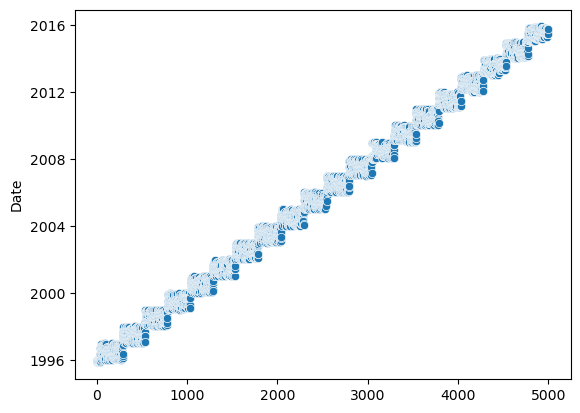

<Figure size 600x400 with 0 Axes>

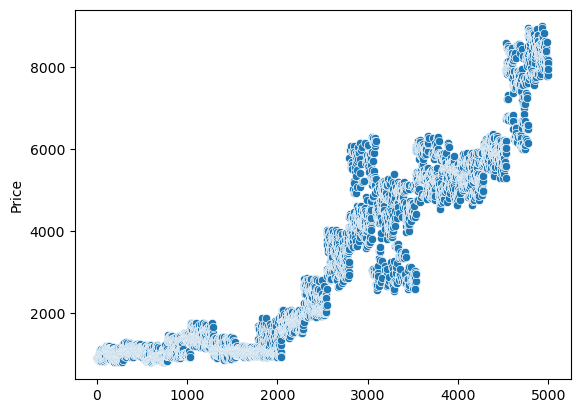

<Figure size 600x400 with 0 Axes>

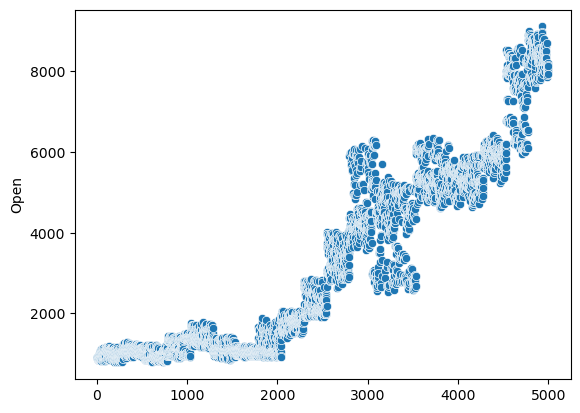

<Figure size 600x400 with 0 Axes>

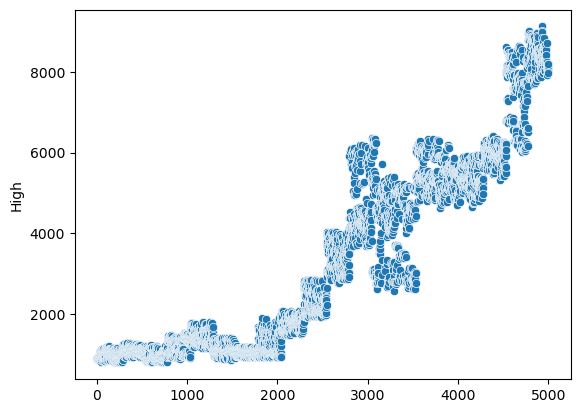

<Figure size 600x400 with 0 Axes>

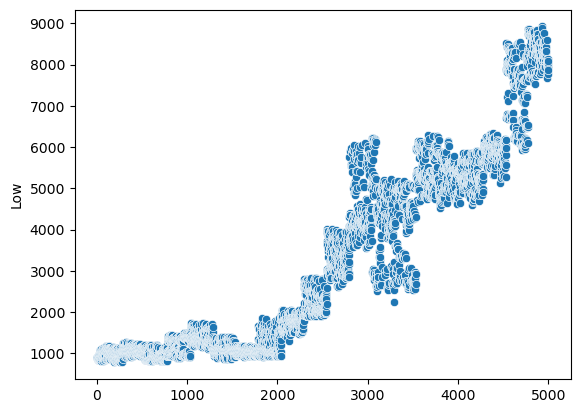

<Figure size 600x400 with 0 Axes>

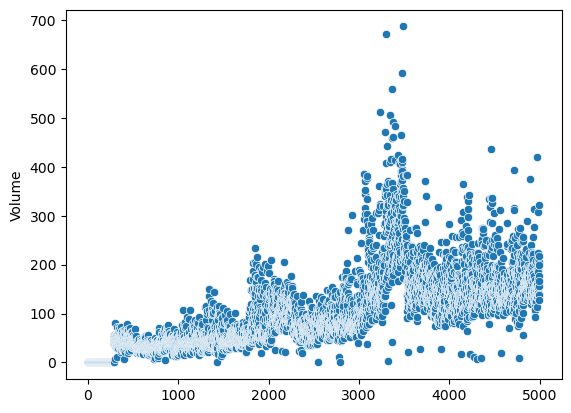

<Figure size 600x400 with 0 Axes>

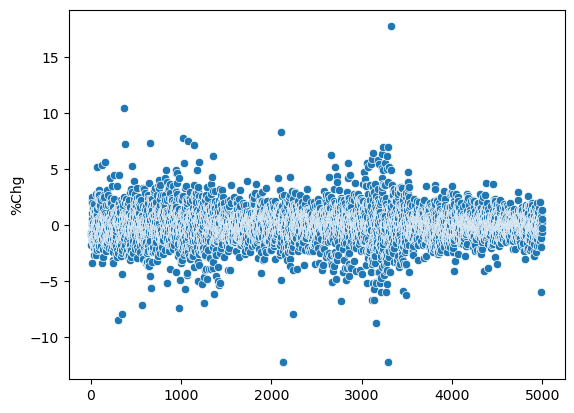

<Figure size 600x400 with 0 Axes>

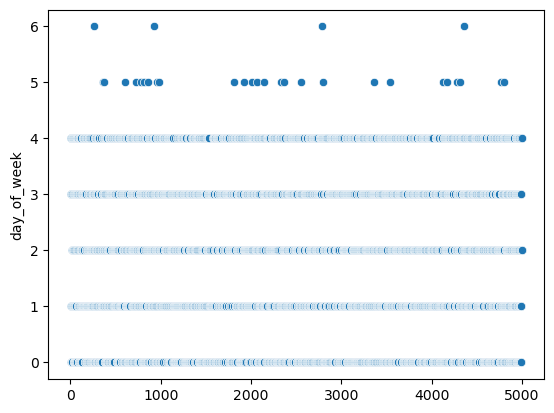

<Figure size 600x400 with 0 Axes>

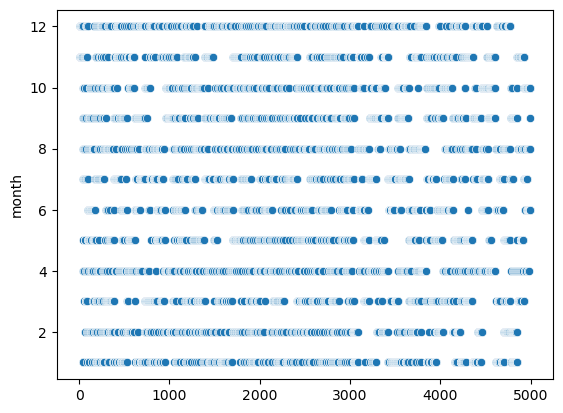

<Figure size 600x400 with 0 Axes>

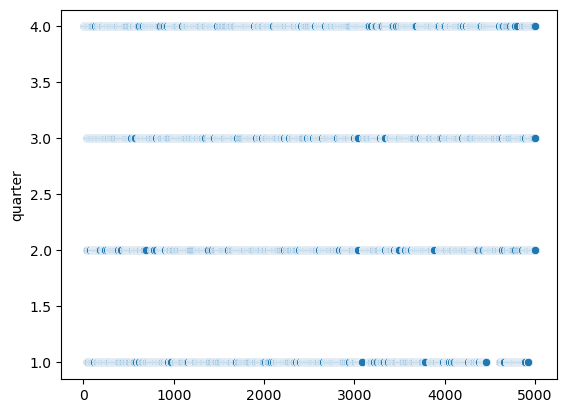

<Figure size 600x400 with 0 Axes>

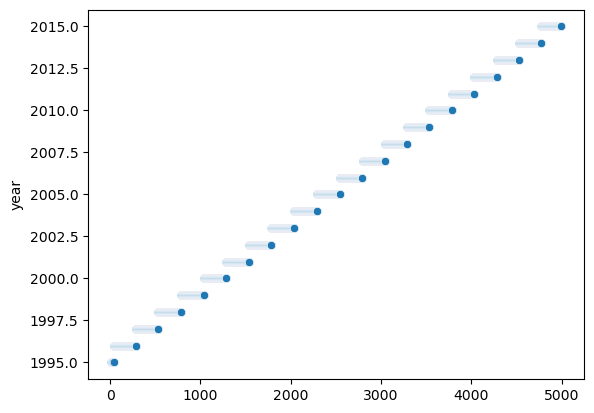

<Figure size 600x400 with 0 Axes>

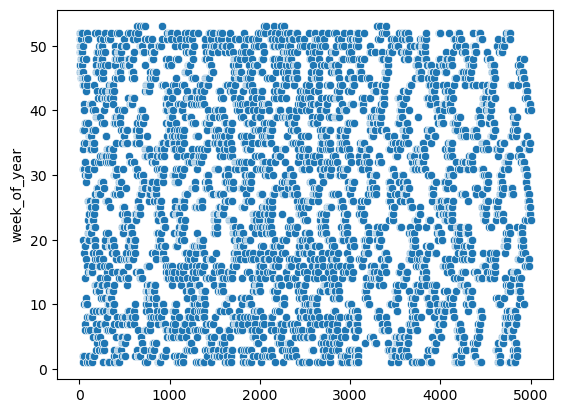

<Figure size 600x400 with 0 Axes>

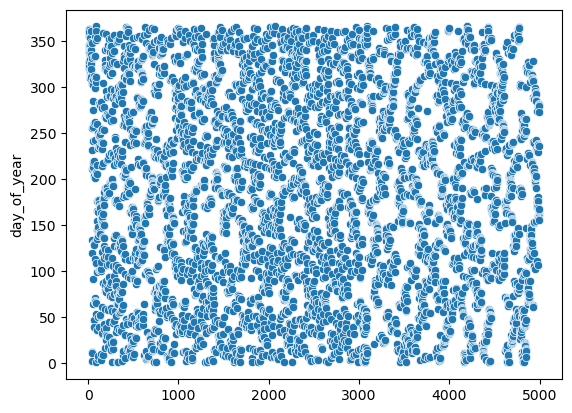

<Figure size 600x400 with 0 Axes>

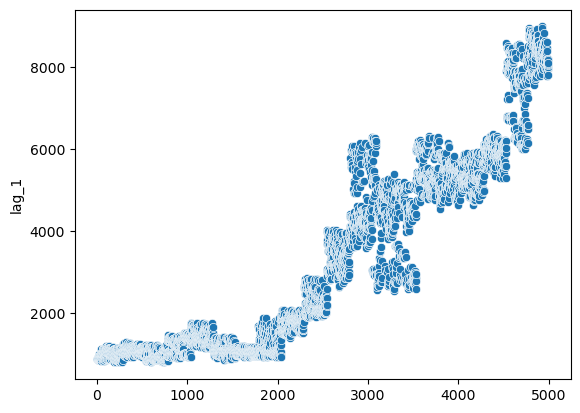

<Figure size 600x400 with 0 Axes>

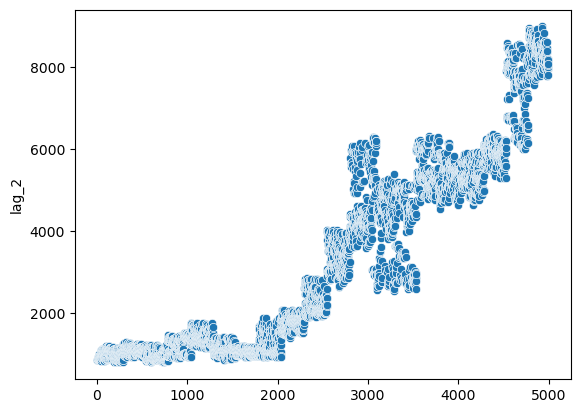

<Figure size 600x400 with 0 Axes>

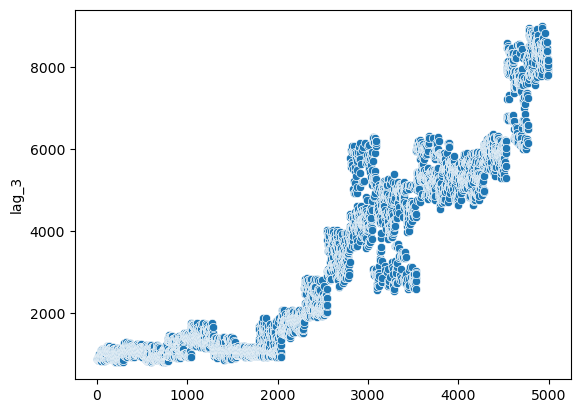

<Figure size 600x400 with 0 Axes>

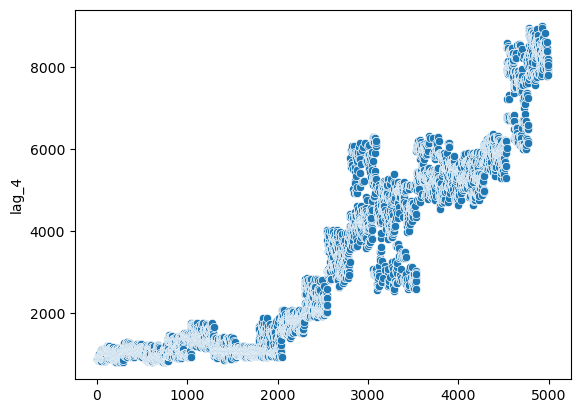

<Figure size 600x400 with 0 Axes>

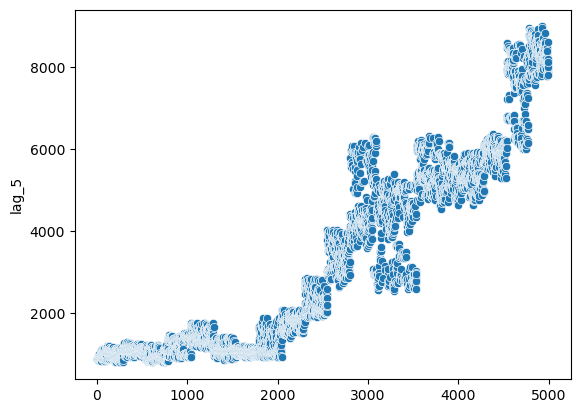

<Figure size 600x400 with 0 Axes>

In [17]:
for i in range(len(feature_list)):
    sns.scatterplot(data=df, y=df[feature_list[i]], x=df.index)
    plt.figure(figsize=(6, 4))
    plt.show()

<Axes: ylabel='Volume'>

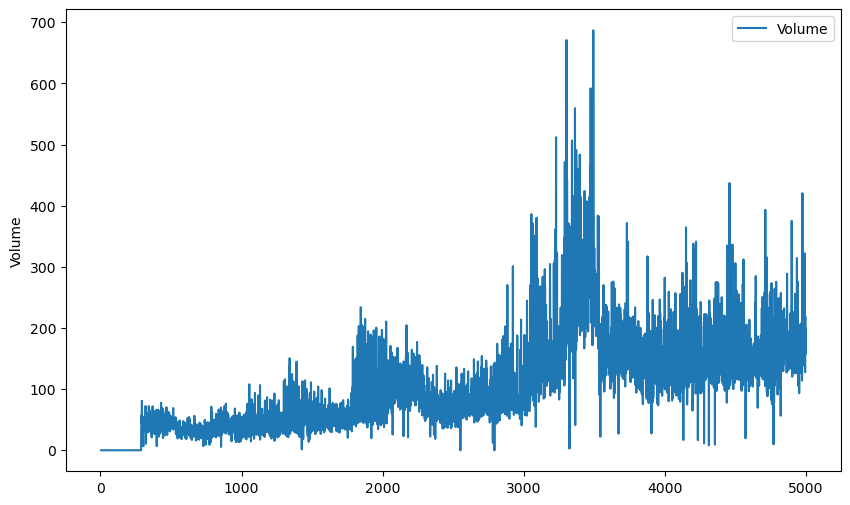

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot (x=df.index, y=df['Volume'], label='Volume')

<Axes: ylabel='Open'>

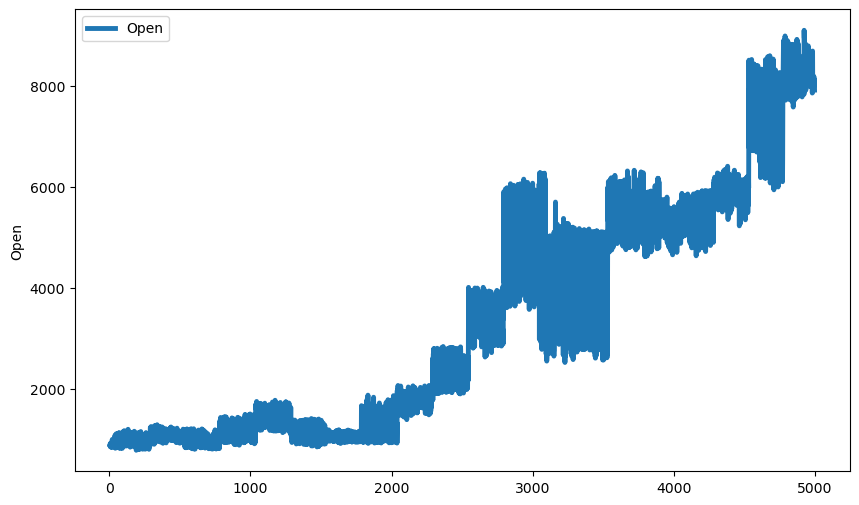

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot (x=df.index, y=df['Open'] , label='Open' , linewidth=3.5)


<Axes: ylabel='High'>

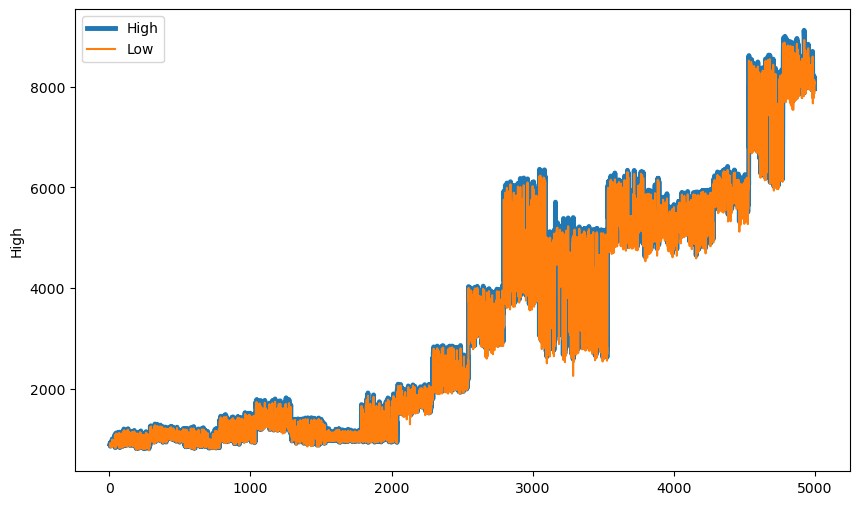

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot (x=df.index, y=df['High'] , label='High' , alpha=1 , linewidth=3.5)
sns.lineplot (x=df.index, y=df['Low'] , label='Low', linewidth=1.5 )


<a id="4.3"></a>
### Correlation Analysis


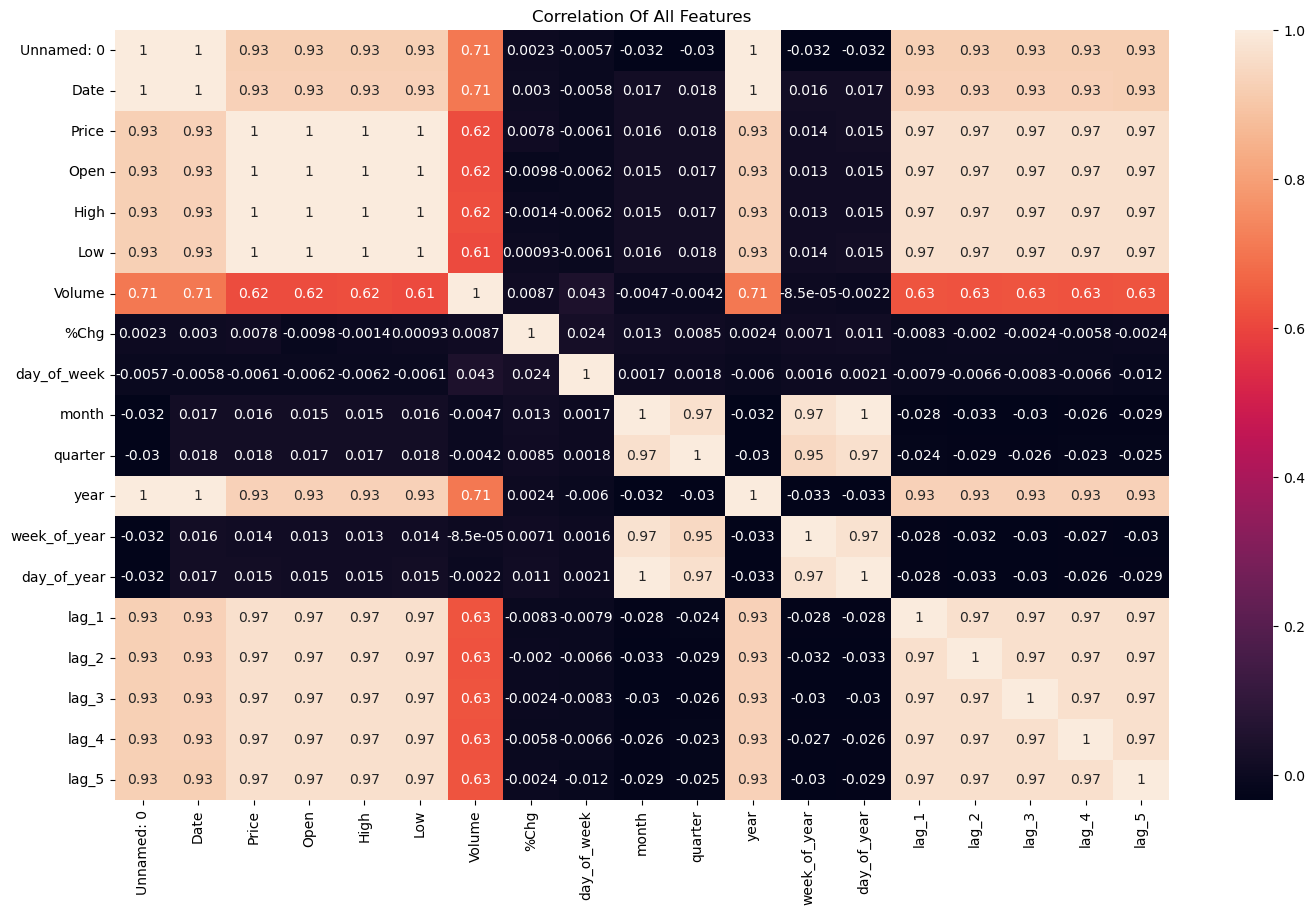

In [21]:
# Heatmap of correlation between features
plt.figure(figsize=(17, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Of All Features')
plt.show()

Observations from Correlation plot

we can see that open high low close have very high correlation with each other, whereas days, months, week etc do not have any impact 

<a id="4.5"></a>
### Pairplots 

C:\Users\91910\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


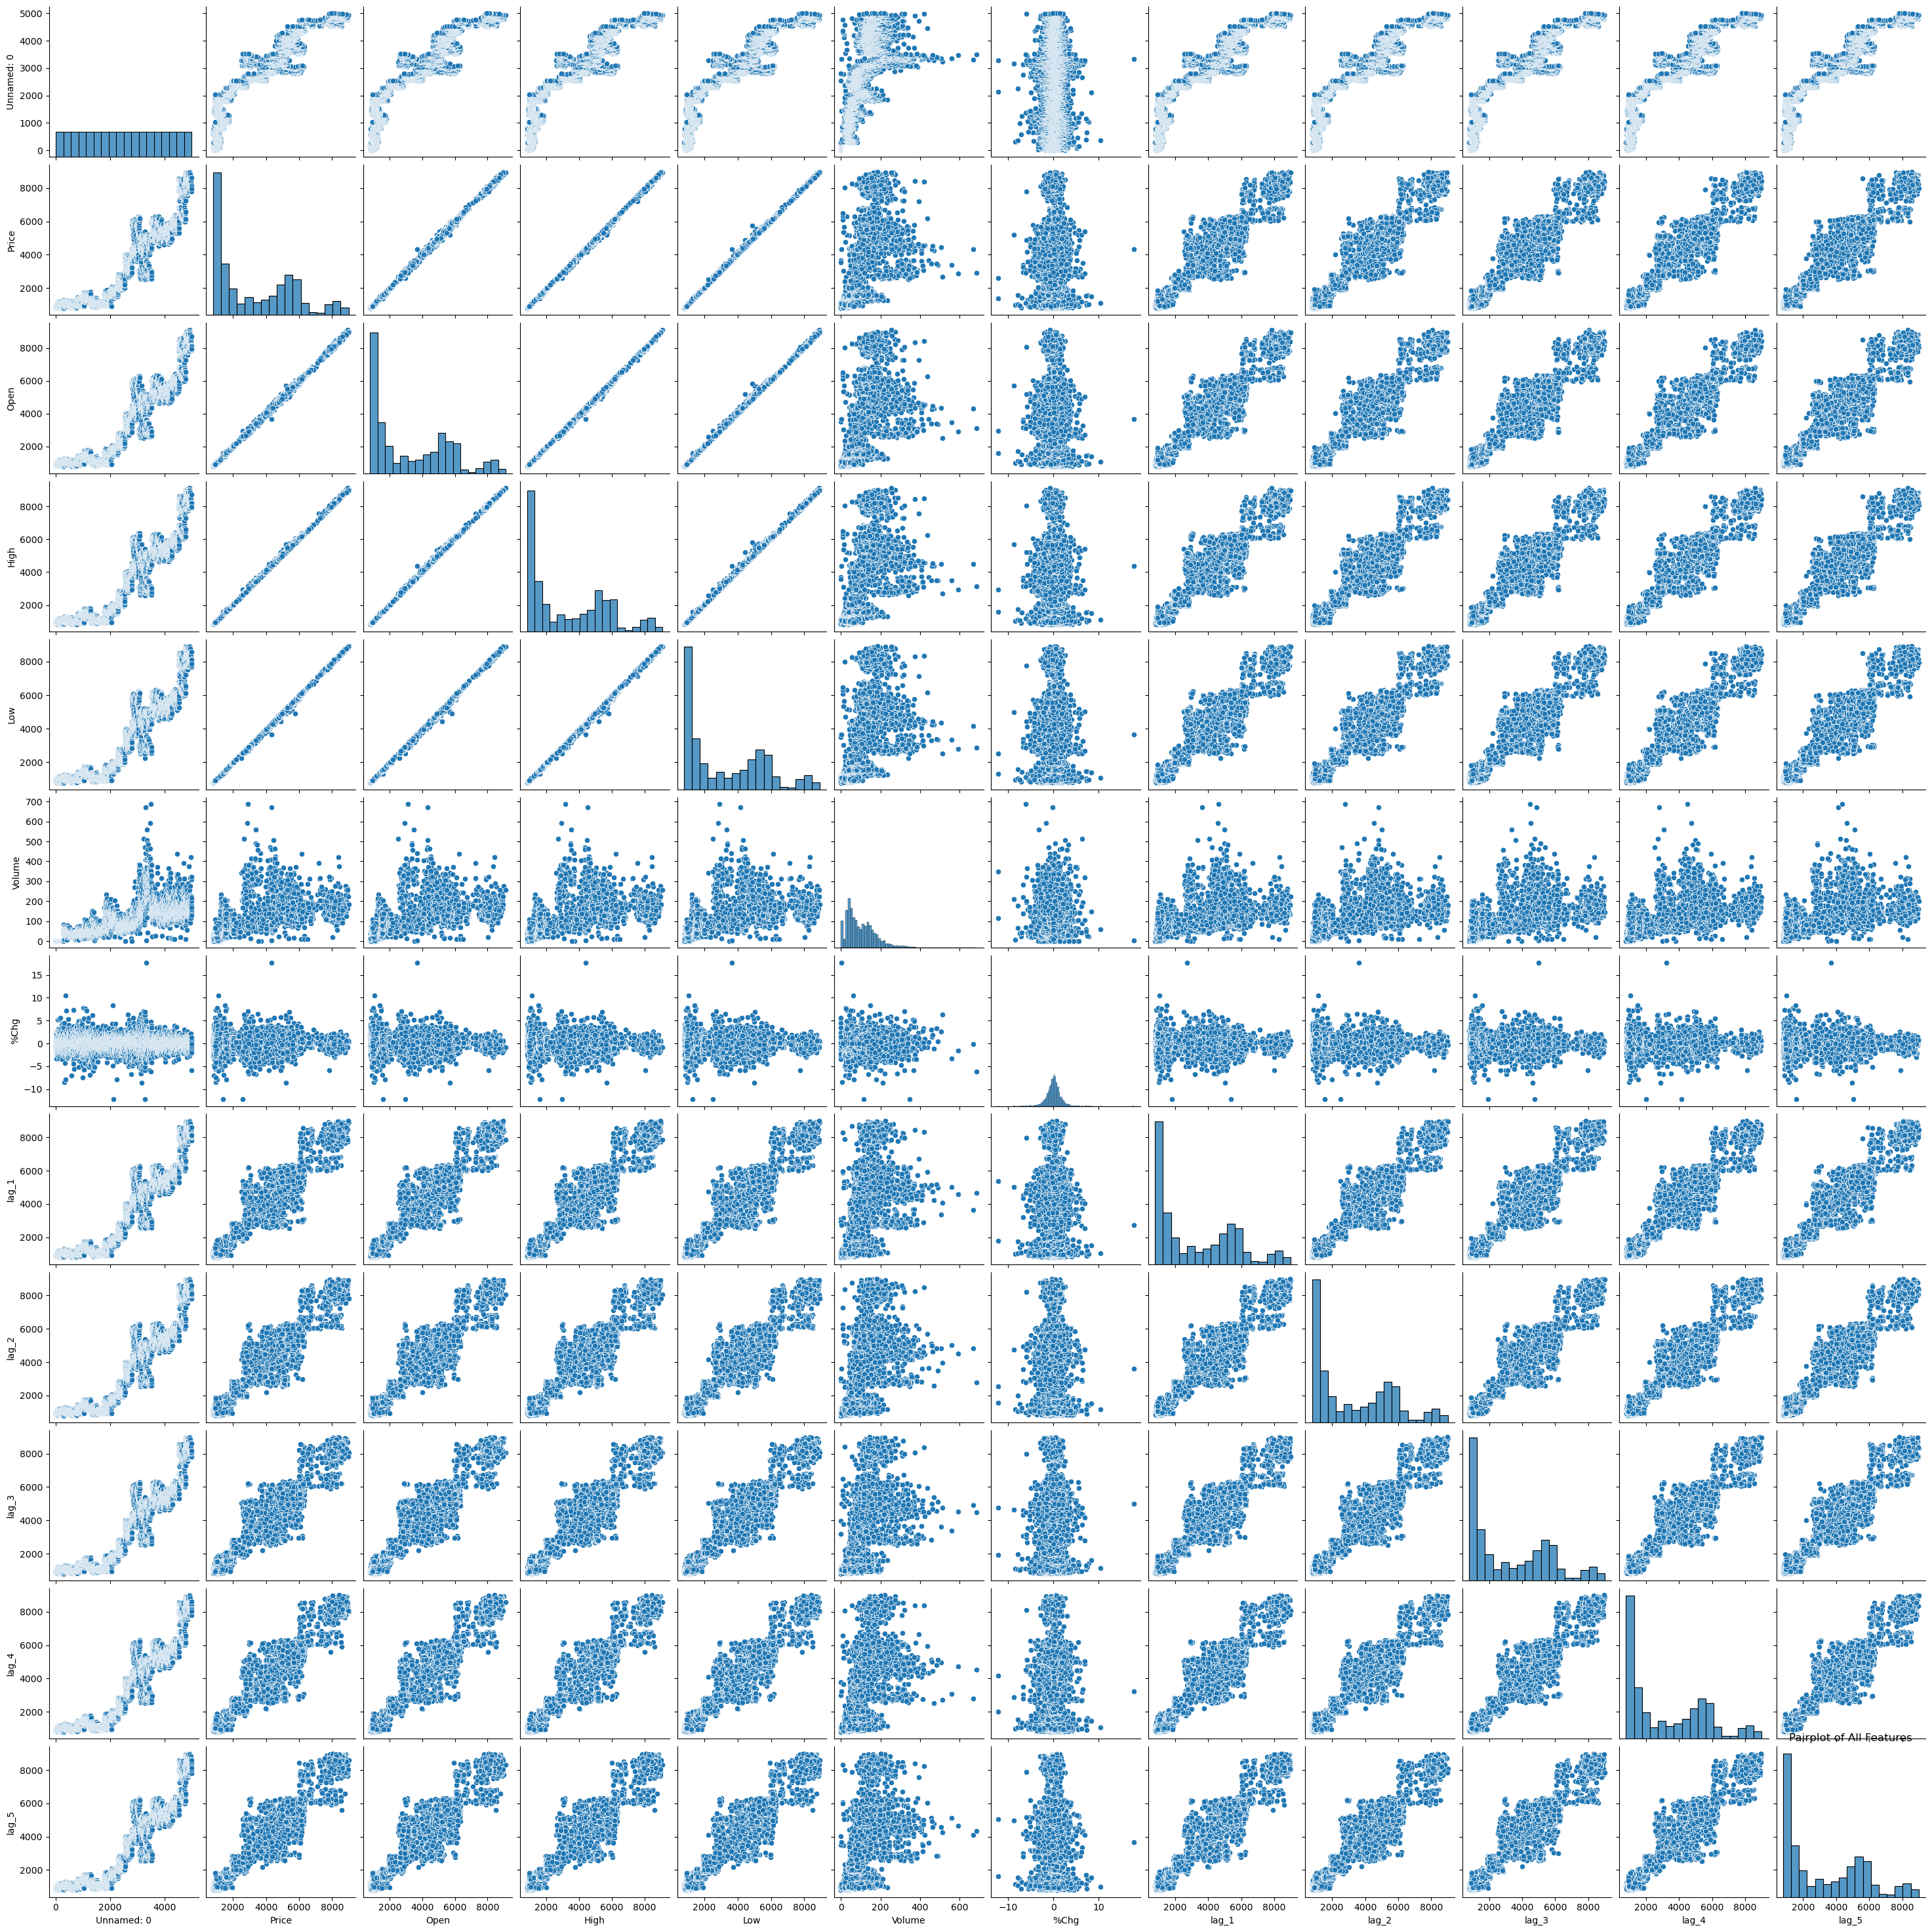

In [23]:
import seaborn as sns

# Drop any non-numeric columns if present
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Pairplot
sns.pairplot(numeric_df)
plt.title('Pairplot of All Features')
plt.show()


Observations of Pairplots

Pairplot of Features:

Displays pairwise relationships among all features.
Demonstrates strong positive correlations among Open, High, Low, and Close prices with linear patterns.
Indicates that the Volume feature lacks strong correlations with other features.

<a id='5'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> Seasonality Assessment </p>
    


<a id="5.1"></a>
### Check for Seasonality of Data 

Checking for seasonality in a dataset is an important step in time series analysis. Seasonality refers to the presence of repetitive and predictable patterns or cycles that occur at regular intervals within the data. Understanding and identifying seasonality is crucial for several reasons:

In [39]:
df_adf_test = pd.read_csv('nifty.csv', index_col = 'Date', parse_dates = True)

In [40]:
df_adf_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4999 entries, 1995-12-11 to 2015-09-30
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4999 non-null   int64  
 1   Price       4999 non-null   float64
 2   Open        4999 non-null   float64
 3   High        4999 non-null   float64
 4   Low         4999 non-null   float64
 5   Volume      4999 non-null   float64
 6   %Chg        4999 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 312.4 KB


<Axes: xlabel='Date'>

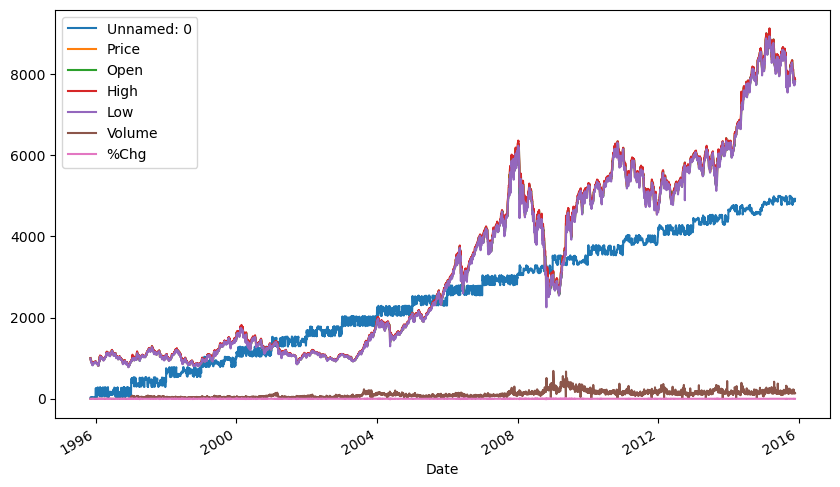

In [41]:
df_adf_test.plot(figsize=(10,6))

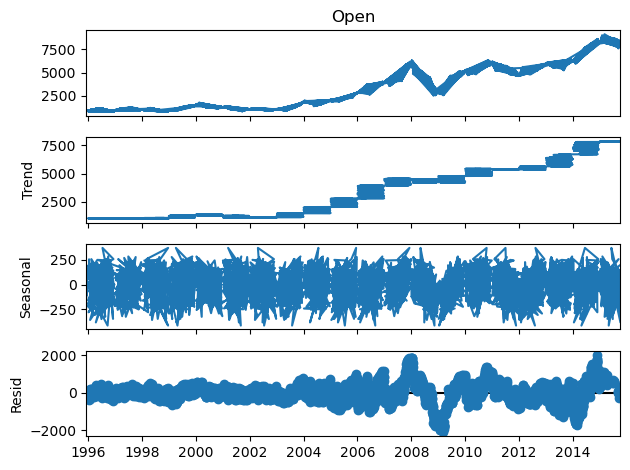

In [42]:
results_open = seasonal_decompose(df_adf_test['Open'] , period=365)
results_open.plot();

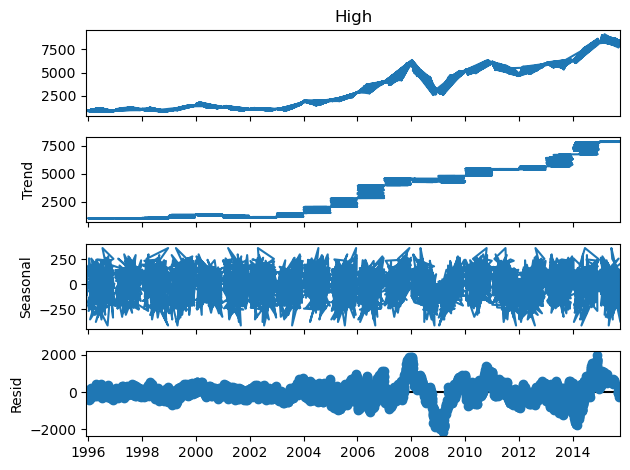

In [43]:
results_high = seasonal_decompose(df_adf_test['High'] , period=365)
results_high.plot();

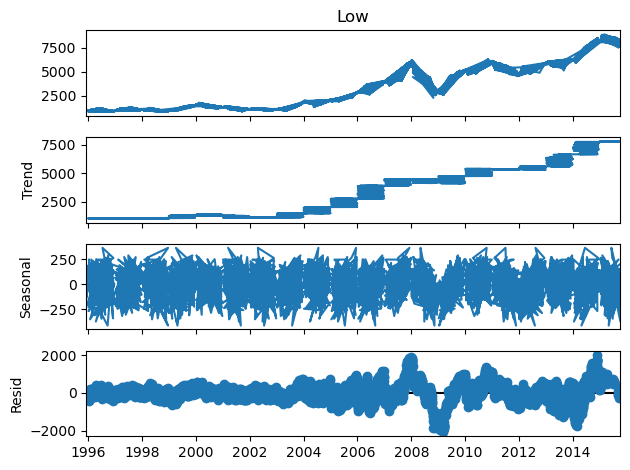

In [44]:
results_low = seasonal_decompose(df_adf_test['Low'] , period=365)
results_low.plot();

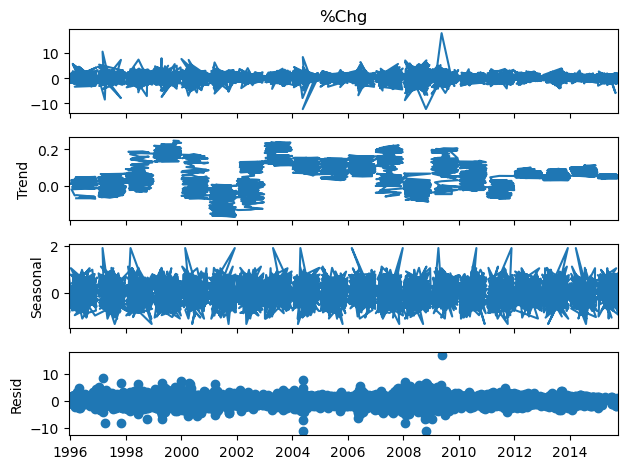

In [45]:
results_chg = seasonal_decompose(df_adf_test['%Chg'] , period=365)
results_chg.plot();

We can see aspects of seasonality in all of these data columns 

# Summary Statistics

In [4]:


# Load the dataset
data = pd.read_csv("nifty.csv")

# Drop the 'Unnamed: 0' column as it seems to be an index
data.drop(columns=['Unnamed: 0'], inplace=True)

# Compute summary statistics
summary_stats = data.describe()

# Display the summary statistics
print(summary_stats)

             Price         Open         High          Low       Volume  \
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.000000   
mean   3306.953585  3307.740212  3335.757526  3277.187259   104.268726   
std    2319.250574  2321.097771  2333.376552  2304.771313    78.143533   
min     788.150000   786.370000   805.820000   775.430000     0.000000   
25%    1129.935000  1131.300000  1141.925000  1120.650000    44.960000   
50%    2566.850000  2558.500000  2585.600000  2526.200000    86.440000   
75%    5262.650000  5266.425000  5302.700000  5225.625000   146.980000   
max    8996.250000  9109.150000  9119.200000  8925.550000   686.890000   

              %Chg  
count  4999.000000  
mean      0.053735  
std       1.585128  
min     -12.240000  
25%      -0.750000  
50%       0.080000  
75%       0.880000  
max      17.740000  


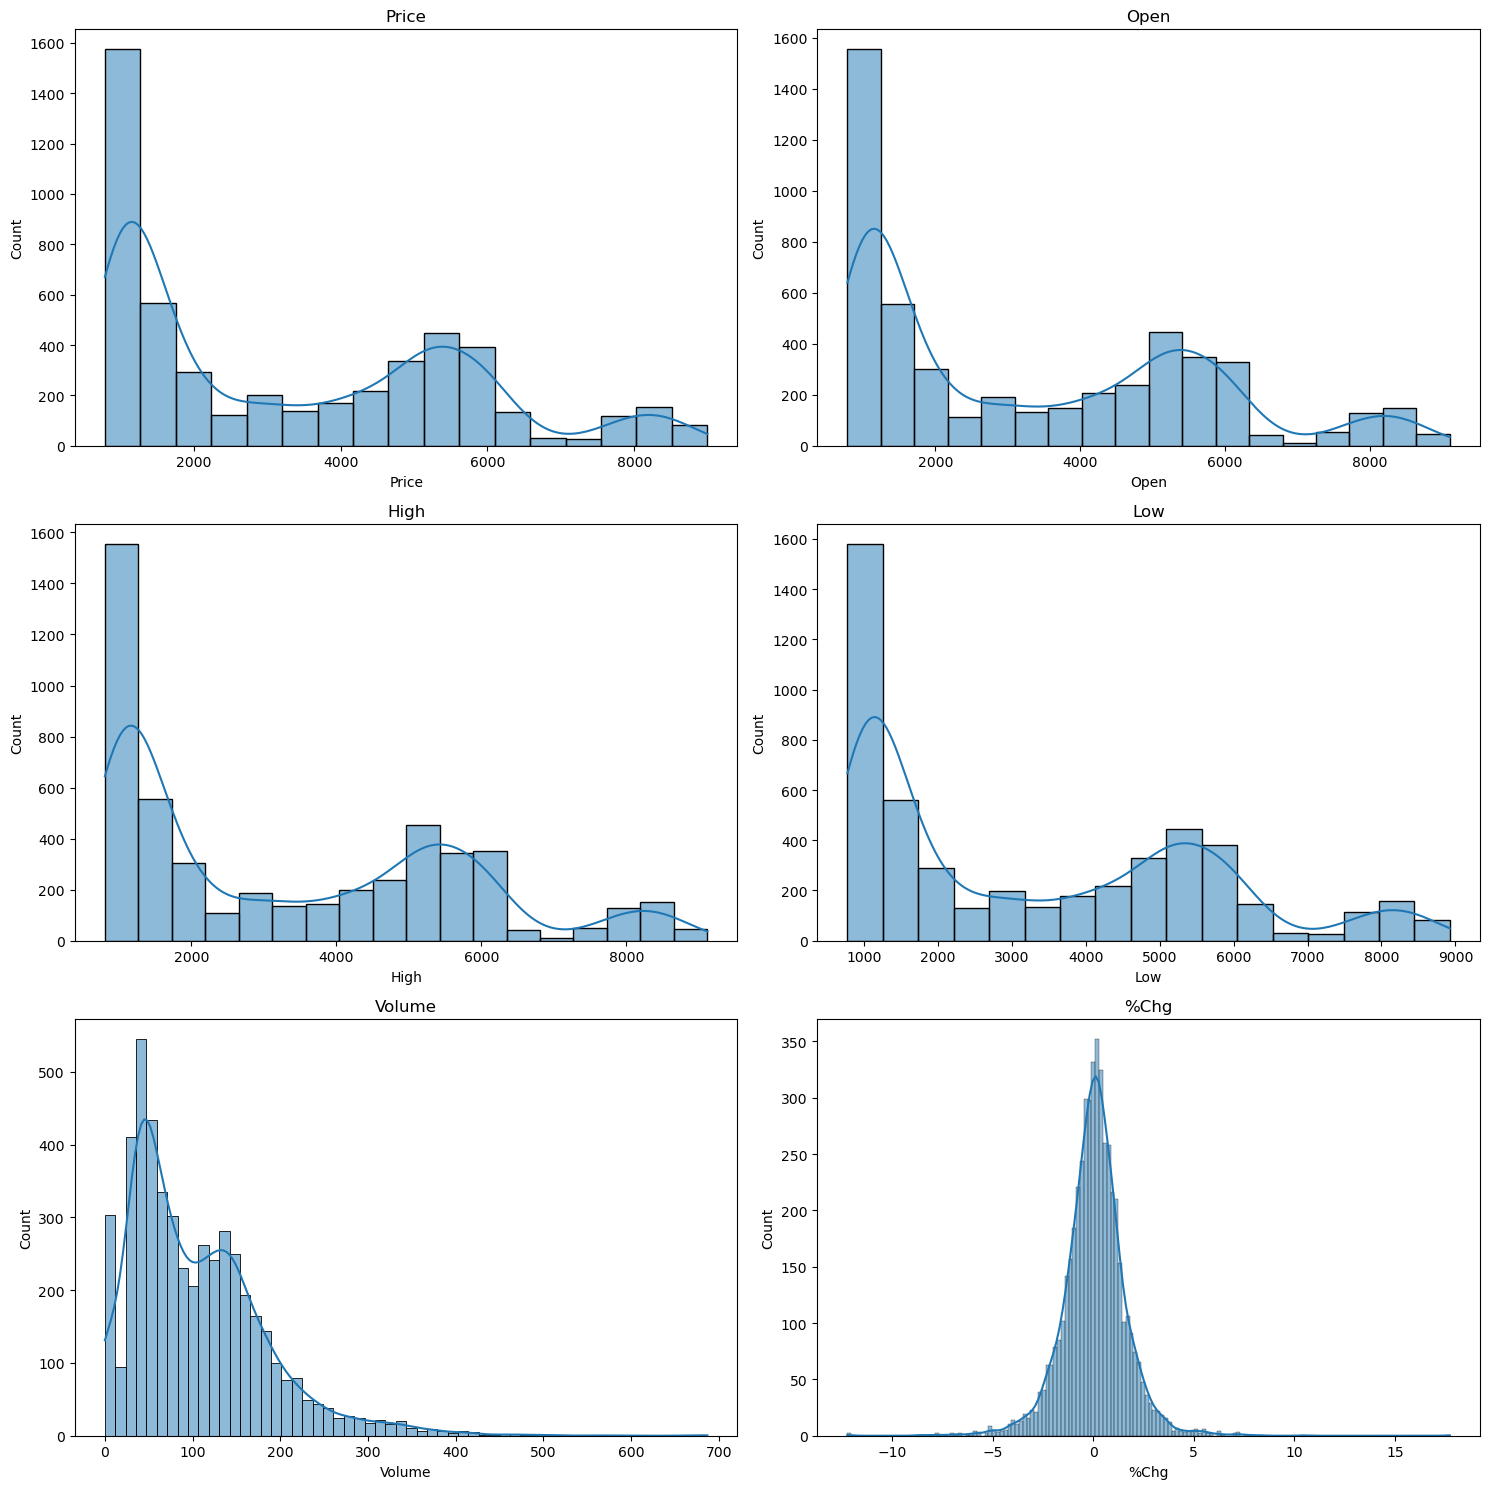

In [5]:


# Filter out numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of plots needed
num_plots = len(numerical_cols)

# Calculate the number of rows and columns for subplots
num_rows = (num_plots + 1) // 2
num_cols = 2

# Set up the figure and axes
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot histograms for each numerical variable
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], ax=axs[i], kde=True)
    axs[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()


# Estimating Parameters

In [7]:



variables = ['Price', 'Open', 'High', 'Low', 'Volume', '%Chg']
# Initialize a dictionary to store parameter values for each distribution
parameters = {}

# Loop over each variable to estimate parameters
for variable in variables:
    print(f"Estimated Parameters for {variable}:")
    
    # Estimate parameters for Normal Distribution
    mean_estimate_normal = data[variable].mean()
    std_estimate_normal = data[variable].std()
    parameters['Normal'] = (mean_estimate_normal, std_estimate_normal)
    print(f"Normal Distribution (Mean, Standard Deviation): {parameters['Normal']}")

    # Estimate parameters for Exponential Distribution (if applicable)
    if (data[variable] > 0).all():
        lambda_estimate_exp = expon.fit(data[variable], floc=0)[1]
        parameters['Exponential'] = (1 / lambda_estimate_exp,)
        print(f"Exponential Distribution (Rate Parameter): {parameters['Exponential']}")
    else:
        print("Exponential Distribution is not applicable due to zero or negative values in the data.")

    # Estimate parameters for Log-Normal Distribution (if applicable)
    if (data[variable] > 0).all():
        log_mean_estimate, log_std_estimate = np.log(data[variable]).mean(), np.log(data[variable]).std()
        parameters['Log-Normal'] = (log_mean_estimate, log_std_estimate)
        print(f"Log-Normal Distribution (Mean of Log, Standard Deviation of Log): {parameters['Log-Normal']}")
    else:
        print("Log-Normal Distribution is not applicable due to zero or negative values in the data.")

    # Estimate parameters for Gamma Distribution (if applicable)
    if (data[variable] > 0).all():
        k_estimate_gamma, _, theta_estimate_gamma = gamma.fit(data[variable], floc=0)
        parameters['Gamma'] = (k_estimate_gamma, theta_estimate_gamma)
        print(f"Gamma Distribution (Shape Parameter, Scale Parameter): {parameters['Gamma']}")
    else:
        print("Gamma Distribution is not applicable due to zero or negative values in the data.")

    # Estimate parameters for Beta Distribution (if applicable)
    if (data[variable] > 0).all():
        alpha_beta_estimate_beta = beta.fit(data[variable])
        parameters['Beta'] = alpha_beta_estimate_beta
        print(f"Beta Distribution (Shape Parameters): {parameters['Beta']}")
    else:
        print("Beta Distribution is not applicable due to zero or negative values in the data.")

    # Estimate parameters for Chi-Squared Distribution (if applicable)
    if (data[variable] > 0).all():
        k_estimate_chi2 = chi2.fit(data[variable])[0]
        parameters['Chi-Squared'] = (k_estimate_chi2,)
        print(f"Chi-Squared Distribution (Degrees of Freedom): {parameters['Chi-Squared']}")
    else:
        print("Chi-Squared Distribution is not applicable due to zero or negative values in the data.")

    print()  # Add a blank line for separation between variables


Estimated Parameters for Price:
Normal Distribution (Mean, Standard Deviation): (3306.9535847169436, 2319.2505736304884)
Exponential Distribution (Rate Parameter): (0.00030239311631753495,)
Log-Normal Distribution (Mean of Log, Standard Deviation of Log): (7.827302124919804, 0.7659961144903741)
Gamma Distribution (Shape Parameter, Scale Parameter): (1.9587160548796783, 1688.3271960111065)
Beta Distribution (Shape Parameters): (0.8170555141309572, 19.614125955996194, 788.1499999999999, 62537.12227977057)
Chi-Squared Distribution (Degrees of Freedom): (1.675856393928231,)

Estimated Parameters for Open:
Normal Distribution (Mean, Standard Deviation): (3307.740212042408, 2321.0977714391174)
Exponential Distribution (Rate Parameter): (0.00030232120296488967,)
Log-Normal Distribution (Mean of Log, Standard Deviation of Log): (7.827427629935046, 0.7660338328576614)
Gamma Distribution (Shape Parameter, Scale Parameter): (1.9579749041022563, 1689.3680328139994)
Beta Distribution (Shape Paramet

C:\Users\91910\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


# Hypothesis Testing

Extracting and storing Dates of festivals in a csv

In [71]:


# Define Diwali and Dussehra festival dates
diwali_dates = {
    1990: '1990-10-18', 1991: '1991-11-05', 1992: '1992-10-25', 1993: '1993-11-13', 1994: '1994-11-03',
    1995: '1995-10-23', 1996: '1996-11-10', 1997: '1997-10-30', 1998: '1998-10-19', 1999: '1999-11-07',
    2000: '2000-10-26', 2001: '2001-11-14', 2002: '2002-11-04', 2003: '2003-10-25', 2004: '2004-11-12',
    2005: '2005-11-01', 2006: '2006-10-21', 2007: '2007-11-09', 2008: '2008-10-28', 2009: '2009-10-17',
    2010: '2010-11-05', 2011: '2011-10-26', 2012: '2012-11-13', 2013: '2013-11-03', 2014: '2014-10-23',
    2015: '2015-11-11'
}

dussehra_dates = {
    1990: '1990-09-29', 1991: '1991-10-17', 1992: '1992-10-06', 1993: '1993-10-24', 1994: '1994-10-13',
    1995: '1995-10-03', 1996: '1996-10-21', 1997: '1997-10-11', 1998: '1998-10-01', 1999: '1999-10-19',
    2000: '2000-10-07', 2001: '2001-10-26', 2002: '2002-10-15', 2003: '2003-10-05', 2004: '2004-10-22',
    2005: '2005-10-12', 2006: '2006-10-02', 2007: '2007-10-21', 2008: '2008-10-09', 2009: '2009-09-28',
    2010: '2010-10-17', 2011: '2011-10-06', 2012: '2012-10-24', 2013: '2013-10-13', 2014: '2014-10-03',
    2015: '2015-10-22'
}

# Create DataFrame for festival dates
festivals_df = pd.DataFrame({'Year': list(diwali_dates.keys()),
                             'Diwali_Date': list(diwali_dates.values()),
                             'Dussehra_Date': list(dussehra_dates.values())})

# Store festival information in a CSV file
festivals_df.to_csv('festivals_info.csv', index=False)

print("Festival information stored in festivals_info.csv file.")


Festival information stored in festivals_info.csv file.


In [72]:



# Load the datasets
nifty_df = pd.read_csv('nifty.csv')
festivals_df = pd.read_csv('festivals_info.csv')

# Convert 'Date' column to datetime format in nifty_df
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'])

# Convert festival dates to datetime format
festivals_df['Diwali_Date'] = pd.to_datetime(festivals_df['Diwali_Date'])
festivals_df['Dussehra_Date'] = pd.to_datetime(festivals_df['Dussehra_Date'])

# Define festival period as ±5 trading days around the festival date
festival_window = 5

# Function to extract stock prices for festival periods
def extract_stock_prices(df, festival_dates, window):
    stock_prices = []
    for date in festival_dates:
        start_date = date - pd.Timedelta(days=window)
        end_date = date + pd.Timedelta(days=window)
        festival_prices = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]['Price'].tolist()
        stock_prices.extend(festival_prices)
    return stock_prices

# Extract stock prices for Diwali and Dussehra festival periods
diwali_prices = extract_stock_prices(nifty_df, festivals_df['Diwali_Date'], festival_window)
dussehra_prices = extract_stock_prices(nifty_df, festivals_df['Dussehra_Date'], festival_window)

# Extract stock prices for all other trading days (excluding festival days)
all_trading_dates = nifty_df[~nifty_df['Date'].isin(festivals_df['Diwali_Date']) & ~nifty_df['Date'].isin(festivals_df['Dussehra_Date'])]['Date']
other_trading_prices = nifty_df[nifty_df['Date'].isin(all_trading_dates)]['Price'].tolist()

# Calculate mean stock prices for festival days and all other trading days
diwali_mean = sum(diwali_prices) / len(diwali_prices)
dussehra_mean = sum(dussehra_prices) / len(dussehra_prices)
other_mean = sum(other_trading_prices) / len(other_trading_prices)

# Perform independent samples t-test for festival days vs. all other trading days
t_statistic_diwali, p_value_diwali = ttest_ind(diwali_prices, other_trading_prices)
t_statistic_dussehra, p_value_dussehra = ttest_ind(dussehra_prices, other_trading_prices)

# Set significance level
alpha = 0.05

# Print results
print("Mean stock price during Diwali festival period:", diwali_mean)
print("Mean stock price during Dussehra festival period:", dussehra_mean)
print("Mean stock price on all other trading days:", other_mean)
print()

# Interpret results for Diwali festival
print("Diwali Festival vs. All Other Trading Days:")
print("T-statistic:", t_statistic_diwali)
print("P-value:", p_value_diwali)
if p_value_diwali < alpha:
    print("Reject the null hypothesis: There is a significant difference in average stock prices between Diwali festival days and all other trading days.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average stock prices between Diwali festival days and all other trading days.")
print()

# Interpret results for Dussehra festival
print("Dussehra Festival vs. All Other Trading Days:")
print("T-statistic:", t_statistic_dussehra)
print("P-value:", p_value_dussehra)
if p_value_dussehra < alpha:
    print("Reject the null hypothesis: There is a significant difference in average stock prices between Dussehra festival days and all other trading days.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average stock prices between Dussehra festival days and all other trading days.")


Mean stock price during Diwali festival period: 3418.3634722222228
Mean stock price during Dussehra festival period: 3490.801407407408
Mean stock price on all other trading days: 3306.252221329587

Diwali Festival vs. All Other Trading Days:
T-statistic: 0.5712393194767166
P-value: 0.5678624962747987
Fail to reject the null hypothesis: There is no significant difference in average stock prices between Diwali festival days and all other trading days.

Dussehra Festival vs. All Other Trading Days:
T-statistic: 0.9118299256386067
P-value: 0.36190125066156165
Fail to reject the null hypothesis: There is no significant difference in average stock prices between Dussehra festival days and all other trading days.


# Feature Engineering

In [45]:
# Load the data
data = pd.read_csv("nifty.csv")

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort data by date
data.sort_values(by='Date', inplace=True)

# Calculate Price Change Percentage
data['Price_Change_Percentage'] = data['Price'].pct_change() * 100

# Calculate Price Momentum (Difference between current price and price 5 days ago)
n_days = 5
data['Price_Momentum'] = data['Price'] - data['Price'].shift(n_days)

# Calculate Volume Change Percentage
data['Volume_Change_Percentage'] = data['Volume'].pct_change() * 100
data.loc[data['Volume_Change_Percentage'] == np.inf, 'Volume_Change_Percentage'] = 0  # Replace inf with 0

# Calculate Volatility
data['Volatility'] = data['High'] - data['Low']

# Calculate Moving Averages
short_window = 5
long_window = 20
data['MA_Short'] = data['Price'].rolling(window=short_window).mean()
data['MA_Long'] = data['Price'].rolling(window=long_window).mean()

# Correct Price_Relative_to_MA calculation
data['Price_Relative_to_MA'] = data['Price'] - data['MA_Long']  # Subtract from moving average

# Drop 'Unnamed: 0' column
data.drop(columns=['Unnamed: 0'], inplace=True)

# Drop rows with missing values (due to rolling calculations)
data.dropna(inplace=True)

# Display the updated dataframe with corrected features
print(data.head())


          Date   Price    Open    High     Low  Volume  %Chg  \
318 1997-01-01  939.55  905.20  941.40  905.20   38.95  4.50   
327 1997-01-02  927.05  941.95  944.00  925.05   49.12 -1.33   
380 1997-01-03  931.65  924.30  932.60  919.55   35.26  0.50   
403 1997-01-06  927.80  932.45  937.95  925.65   26.32 -0.41   
499 1997-01-07  928.80  926.35  935.15  922.25   44.47  0.11   

     Price_Change_Percentage  Price_Momentum  Volume_Change_Percentage  \
318                 4.498943           55.17                  0.000000   
327                -1.330424           45.05                 26.110398   
380                 0.496198           47.60                -28.216612   
403                -0.413245           16.00                -25.354509   
499                 0.107782           29.70                 68.958967   

     Volatility  MA_Short   MA_Long  Price_Relative_to_MA  
318       36.20    903.30  847.4475               92.1025  
327       18.95    912.31  852.7875               

In [48]:
# Reset index
data.reset_index(drop=True, inplace=True)

# Define function to generate buy, sell, hold signals
def generate_signals(data):
    signals = []
    for i in range(len(data)):
        if (data['Price'][i] > data['MA_Short'][i]) and (data['Price'][i] > data['MA_Long'][i]) and (data['Price_Momentum'][i] > 0) and (data['Volume_Change_Percentage'][i] > 0):
            signals.append('Buy')
        elif (data['Price'][i] < data['MA_Short'][i]) and (data['Price'][i] < data['MA_Long'][i]) and (data['Price_Momentum'][i] < 0) and (data['Volume_Change_Percentage'][i] < 0):
            signals.append('Sell')
        else:
            signals.append('Hold')
    return signals

# Generate signals
data['Signal'] = generate_signals(data)

# Display the dataframe with signals
print(data[['Date', 'Price', 'MA_Short', 'MA_Long', 'Price_Momentum', 'Volume_Change_Percentage', 'Signal']].head())

        Date   Price  MA_Short   MA_Long  Price_Momentum  \
0 1997-01-01  939.55    903.30  847.4475           55.17   
1 1997-01-02  927.05    912.31  852.7875           45.05   
2 1997-01-03  931.65    921.83  858.8985           47.60   
3 1997-01-06  927.80    925.03  865.8810           16.00   
4 1997-01-07  928.80    930.97  872.2095           29.70   

   Volume_Change_Percentage Signal  
0                  0.000000   Hold  
1                 26.110398    Buy  
2                -28.216612   Hold  
3                -25.354509   Hold  
4                 68.958967   Hold  


# one way ANOVA 

In [66]:


# Selected columns for ANOVA
selected_columns = ['Price', 'Open', 'High', 'Low', 'Volume', '%Chg', 
                    'Price_Change_Percentage', 'Price_Momentum', 
                    'Volume_Change_Percentage', 'Volatility', 
                    'MA_Short', 'MA_Long', 'Price_Relative_to_MA']

# Perform ANOVA test
anova_results = {}
for col in selected_columns:
    group_data = [data[col][data['Signal'] == signal] for signal in data['Signal'].unique()]
    anova_result = f_oneway(*group_data)
    anova_results[col] = {'F-statistic': anova_result.statistic, 'P-value': anova_result.pvalue}

# Print ANOVA results
print("ANOVA Results:")
for col, result in anova_results.items():
    print(f"{col}: F-statistic: {result['F-statistic']}, P-value: {result['P-value']}")

# Perform pairwise t-tests for pairwise comparisons
pairwise_results = {}
for i, col1 in enumerate(selected_columns):
    for j, col2 in enumerate(selected_columns):
        if i < j:
            for signal in data['Signal'].unique():
                group1 = data[col1][data['Signal'] == signal]
                group2 = data[col2][data['Signal'] == signal]
                ttest_result = ttest_ind(group1, group2)
                pairwise_results[(col1, col2, signal)] = {'T-statistic': ttest_result.statistic, 'P-value': ttest_result.pvalue}




ANOVA Results:
Price: F-statistic: 0.10091902763362909, P-value: 0.9040081854124016
Open: F-statistic: 0.008933352546822218, P-value: 0.9911064480946088
High: F-statistic: 0.030291176415649455, P-value: 0.9701631929478068
Low: F-statistic: 0.051560910143146864, P-value: 0.9497463354594214
Volume: F-statistic: 17.01566059010055, P-value: 4.3328969605765304e-08
%Chg: F-statistic: 267.00118511392606, P-value: 1.4513882647601612e-110
Price_Change_Percentage: F-statistic: 266.99415968416645, P-value: 1.460574927334091e-110
Price_Momentum: F-statistic: 678.1080965001653, P-value: 1.6286707489445892e-259
Volume_Change_Percentage: F-statistic: 8.91443416820334, P-value: 0.00013671748395831988
Volatility: F-statistic: 12.131883887391135, P-value: 5.555500426297513e-06
MA_Short: F-statistic: 0.11798456385552955, P-value: 0.8887123989241796
MA_Long: F-statistic: 1.2174303098690544, P-value: 0.2960829761296399
Price_Relative_to_MA: F-statistic: 638.4500696026157, P-value: 4.686330026716397e-246


Insights

Price, Open, High, Low: These variables show high p-values (close to 1), indicating that they are not significantly associated with changes in volume. This suggests that fluctuations in these price-related variables do not have a significant impact on trading volume.

%Chg, Price_Change_Percentage, Price_Momentum, Volatility, Volume_Change_Percentage, Price_Relative_to_MA: These variables exhibit extremely low p-values (close to 0), suggesting strong evidence of association with changes in volume. It implies that fluctuations in these metrics are likely to influence trading volume significantly.

MA_Short, MA_Long: Both Moving Average variables have high p-values, indicating that they are not significantly associated with changes in volume. This suggests that the moving average indicators, both short and long term, may not be strong predictors of volume changes.

# Two Way ANOVA

In [56]:


# Define your numerical data
numerical_data = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

# Define the bins for categorization
bins = [0, 30, 60, 90]  # Define the boundaries of your bins

# Define the labels for the categories
labels = ['Low', 'Medium', 'High']  # Labels for the categories corresponding to the bins

# Use pd.cut() to create categorical variables
categorical_data = pd.cut(numerical_data, bins=bins, labels=labels)

# Display the result
print(categorical_data)


[NaN, 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']


In [65]:



# Assume 'data' is already loaded with your dataset

# Calculate the price range
data['Price_Range'] = data['High'] - data['Low']

# Define bins for the price range based on quartiles
data['Range_Category'] = pd.qcut(data['Price_Range'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Perform two-way ANOVA to compare 'Volume' across different price range categories and 'Signal'
formula = 'Volume ~ C(Range_Category) + C(Signal) + C(Range_Category):C(Signal)'
model = ols(formula, data=data).fit()
anova_table = anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)


                                   sum_sq      df            F        PR(>F)
C(Range_Category)            1.165653e+07     3.0  1193.910320  0.000000e+00
C(Signal)                    3.983697e+05     2.0    61.204037  5.751855e-27
C(Range_Category):C(Signal)  4.403990e+04     6.0     2.255376  3.550179e-02
Residual                     1.528936e+07  4698.0          NaN           NaN


Insights

C(Range_Category):
The sum of squares (sum_sq) for 'Range_Category' is 1.165653e+07, indicating the total variability attributed to this variable.
With 3 degrees of freedom (df), the F-statistic is 1193.91, suggesting a significant association between 'Range_Category' and the dependent variable.
The extremely low p-value (PR(>F) = 0.0) indicates strong evidence against the null hypothesis, implying that 'Range_Category' significantly affects the dependent variable.

C(Signal):
The sum of squares for 'Signal' is 3.983697e+05, indicating its contribution to the total variability in the dependent variable.
With 2 degrees of freedom, the F-statistic is 61.204037, indicating a significant association between 'Signal' and the dependent variable.
The very low p-value (PR(>F) = 5.751855e-27) suggests strong evidence against the null hypothesis, indicating that 'Signal' significantly influences the dependent variable.

C(Range_Category):C(Signal) (Interaction Effect):
The sum of squares for the interaction between 'Range_Category' and 'Signal' is 4.403990e+04, representing the additional variability explained when both variables are considered together.
With 6 degrees of freedom, the F-statistic is 2.255376, indicating the significance of the interaction effect.
The relatively low p-value (PR(>F) = 0.0355) suggests evidence against the null hypothesis, implying that the interaction between 'Range_Category' and 'Signal' has a significant impact on the dependent variable.

Residual:
The residual sum of squares is 1.528936e+07, representing the unexplained variability in the dependent variable after accounting for the effects of 'Range_Category', 'Signal', and their interaction.
With 4698 degrees of freedom, the residual F-statistic is not computed because the model contains all the degrees of freedom.

# Correlation analysis

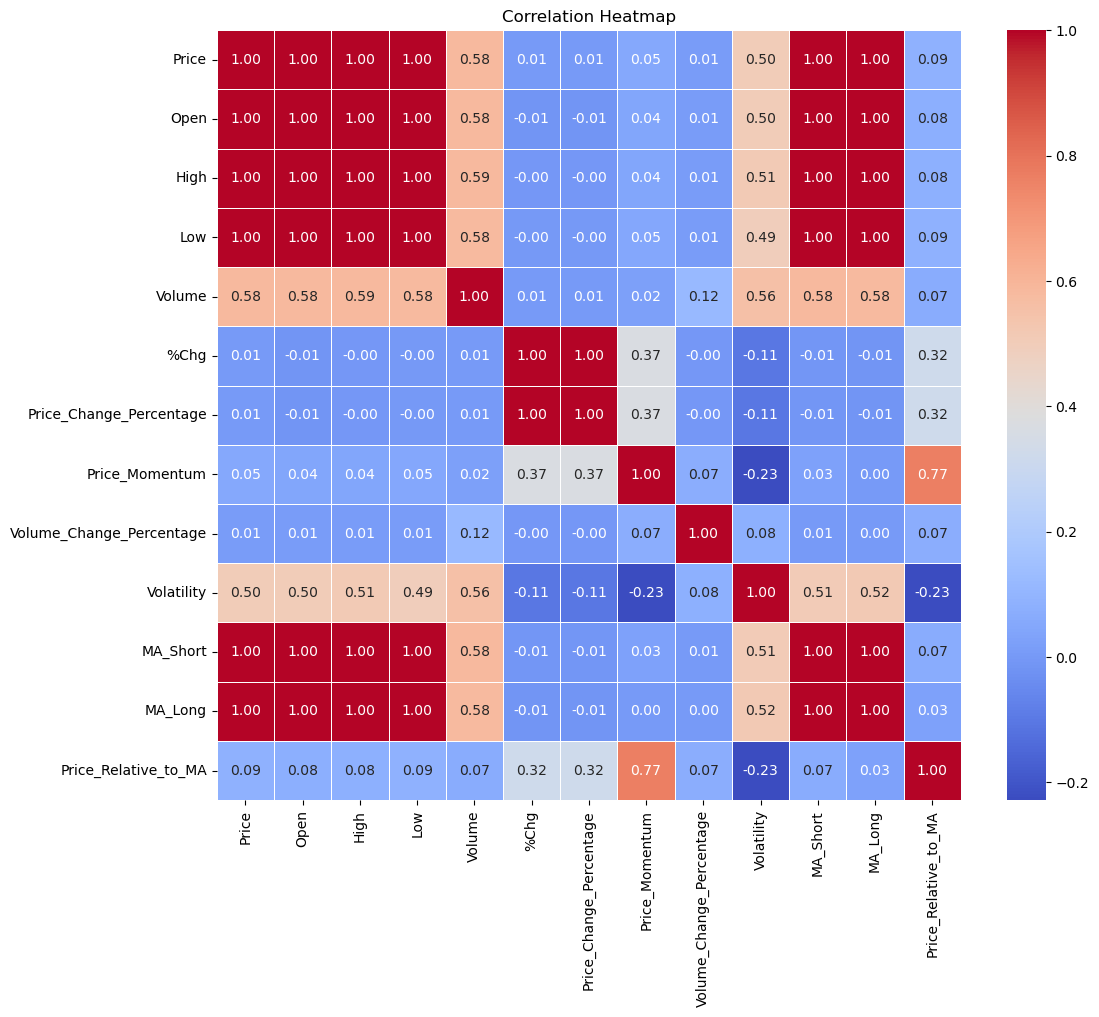

In [44]:


# Select all columns for correlation
selected_columns = ['Price', 'Open', 'High', 'Low', 'Volume', '%Chg', 'Price_Change_Percentage', 
                    'Price_Momentum', 'Volume_Change_Percentage', 'Volatility', 'MA_Short', 'MA_Long', 
                    'Price_Relative_to_MA']

# Calculate the correlation matrix
correlation_matrix = data[selected_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [32]:
buy_count = (data['Signal'] == 'Buy').sum()
sell_count = (data['Signal'] == 'Sell').sum()
hold_count = (data['Signal'] == 'Hold').sum()

print("Buy Count:", buy_count)
print("Sell Count:", sell_count)
print("Hold Count:", hold_count)

Buy Count: 983
Sell Count: 617
Hold Count: 3110


# MODEL

In [67]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data[['Price', 'Open', 'High', 'Low', 'Volume', '%Chg', 'Price_Change_Percentage', 'Price_Momentum', 
          'Volume_Change_Percentage', 'Volatility', 'MA_Short', 'MA_Long', 'Price_Relative_to_MA']]
y = data['Signal']




# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (3768, 13) (3768,)
Testing set shape: (942, 13) (942,)


In [68]:


# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.9585987261146497
Classification Report:
              precision    recall  f1-score   support

         Buy       0.93      0.95      0.94       198
        Hold       0.97      0.97      0.97       629
        Sell       0.93      0.94      0.94       115

    accuracy                           0.96       942
   macro avg       0.94      0.95      0.95       942
weighted avg       0.96      0.96      0.96       942

